# Anomaly Detection for Exotic Event Identification at the Large Hadron Collider 




## Brief Introduction to the Standard Model and Large Hadron Collider


The Standard model (`SM`) of Particle Physics is the most complete model physicists have for understanding the interactions of the fundamental particles in the universe. The elementary particles of the SM are shown in Fig.1.

---
<figure>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Standard_Model_of_Elementary_Particles.svg/627px-Standard_Model_of_Elementary_Particles.svg.png" alt="SM" style="width: 600px;"/>
    <figcaption>Fig.1 - Elementary particles of the Standard Model.</figcaption>
</figure>

---

It is comprised of matter particles (**fermions**):
- **leptons**
    - electrons
    - muon
    - tau
    - and respective neutrinos
- **quarks** which are the building blocks of protons

as well as force carrier particles (**bosons**):
- photon and W/Z bosons (electroweak force)
- gluons (strong force)

and the Higgs boson which is attributed to the mechanism which gives particles their mass.


Though the SM has experimentally stood the test of time, many outstanding questions about the universe and the model itself remain, and scientist continue to probe for inconsistencies in the SM in order to find new physics. More exotic models such as **Supersymmetry (SUSY)** predic mirror particles which may exist and have alluded detection thus far. 

---

The **Large Hadron Collider** (LHC) is a particle smasher capable of colliding protons at a centre of mass energy of 14 TeV.
**ATLAS** is general purpouse particle detectors tasked with recording the remnants of proton collisions at the collicion point. The main purpouse of this experiment is to test the SM rigorously, and ATLAS was one of two expeririments (ATLAS+CMS) responsible for the discovery of the **Higgs boson in 2012**. 

Find an animation of how particles are reconstructed within a slice of the ATLAS detector here: https://videos.cern.ch/record/2770812. Electrons, muons, photons, quark jets, etc, will interact with different layers of the detector in different ways, making it possible to design algorithms which distinguish reconstructed particles, measure their trajectories, charge and energy, and identify them as particular types.

Figure 2 shows an event display from a data event in ATLAS in which 2 muons (red), 2 electrons (green), and 1 quark-jet (purple cone) are found. This event is a candidate to a Higgs boson decaying to four leptons with an associated jet: $$H (+j)\rightarrow 2\mu 2e (+j)$$ 



---

<figure>
    <img src="https://twiki.cern.ch/twiki/pub/AtlasPublic/EventDisplayRun2Physics/JiveXML_327636_1535020856-RZ-LegoPlot-EventInfo-2017-10-18-19-01-24.png" alt="Higgs to leptons" style="width: 600px;"/>
    <figcaption>Fig.2 - Event display of a Higgs candidate decaying to two muons and two electrons.</figcaption>
</figure>

---


Particles are shown transversing the detector material. The 3D histogram show 
* the azimuth $\phi$ ( angle around the beam, 0 is up)
* pseudo-rapidity $\eta$ (trajectory along the beam) positions of the particle directions with respect to the interaction point.
* The total energy measured for the particle is denoted by $E$,
* the transverse momentum ($p_T$) deposited by the particle in giga-electronvolts (GeV) are shown by the hight of the histograms.

A particle kinematics can then be described by a four-vector  $$\bar{p} = (E,p_T,\eta,\phi)$$

An additional importan quantity is the missing energy in the transverse plane (MET). This is calculated by taking the negative sum of the transverse momentum of all particles in the event.
$$\mathrm{MET} = -\sum p_T$$

With perfect detector performance the MET will sum to 0 if all outgoing particles are observed by the detector. Neutrinos cannot be measured by the detector and hence their precense produces non-zero MET.

## Anomally detection dataset

For the anomally detection project we will use the dataset discussed in this publication: <p><a href="https://arxiv.org/pdf/2105.14027.pdf" title="Anomalies">The Dark Machines Anomaly Score Challenge:
Benchmark Data and Model Independent Event
Classification for the Large Hadron Collider</a></p>

Familiarise yourself with the paper, in particular from sections 2.1 to 4.4.

---

The dataset contains a collection of simulated proton-proton collisions in a general particle physics detector (such as ATLAS). We will use a dataset containing `340 000` SM events (referred to as channel 2b in the paper) which have at least 2 electrons/muons in the event with $p_T>15$ GeV. 

**The events can be found in `background_chan2b_7.8.csv`**


You can see all the SM processes that are simulated in Table 2 of the paper, 

    e.g., an event with a process ID of `w_jets` is a simulated event of two protons producing a lepton and neutrino and at least two jets.
    
$$pp\rightarrow \ell\nu(+2j)$$

---

The datasets are collected as CSV files where each line represents a single event, with the current format:

`event ID; process ID; event weight; MET; METphi; obj1, E1, pt1, eta1, phi1; obj2, E2, pt2, eta2, phi2; ...`<br>

See Section 2.2 for a description of the dataset.<br>
Variables are split by a semicolon `";"`
- `event ID`: an identifier for the event number in the simulation
- `process ID`: an identifier for the event simulation type
- `event weight`: the weight associated to the simulated event (how important that event is)
- `MET`: the missing transverse energy
- `METphi`: the azimuth angle (direction) of the MET

Followed by a list of objects (particles) whose variables are split by commas `","` in the following order:
- `obj`: the object type,

    |Key|Particle|
    |---|---|
    |j|jet|
    |b|b-jet|
    |e-|electron|
    |e+|positron|
    |m-|muon|
    |m+|muon+|
    |g|photon|
    
    *see Table 1 of the paper*
- `E`: the total measured particle energy in MeV, [0,inf]
- `pt`: the transverse mementum in MeV, [0,inf]
- `eta`: pseudo-rapidity, [-inf,inf]
- `phi`: azimuth angle, radians [-3.14,3.14]

e.g. row 1 of the `SM` dataset looks like:<br>
`5702564;z_jets;1;102549;-2.9662;j,335587,132261,-1.57823,1.02902;j,107341,106680,-0.0989776,-2.67901;j,85720.1,62009,0.840127,-1.73805;j,270540,58844.5,2.20566,1.6064;j,55173.9,52433.5,-0.183147,2.62501;j,48698.6,37306.4,-0.719927,-1.7898;j,148467,23648,-2.52332,-1.70799;e-,186937,131480,0.888915,-0.185666;e+,80014.3,79281.7,0.135844,0.275231;`

---

In addition to the `SM` events we are also provided simulated events from `Beyond Standard Model` (`BSM`) exotic physics models. They are summarised here:

|Model | File Name | 
|---|---|
|**SUSY chargino-chargino process**||
||`chacha_cha300_neut140_chan2b.csv`|
||`chacha_cha400_neut60_chan2b.csv`|
||`chacha_cha600_neut200_chan2b.csv`|
|**SUSY chargino-neutralino processes**||
||`chaneut_cha200_neut50_chan2b.csv`|
||`chaneut_cha250_neut150_chan2b.csv`|
|**$Z'$ decay to leptons**||
||`pp23mt_50_chan2b.csv`|
||`pp24mt_50_chan2b.csv`|
|**Gluino and RPV SUSY**||
||`gluino_1000.0_neutralino_1.0_chan2b.csv`||
||`stlp_st1000_chan2b.csv`||



## Project description
*Responsible:* Robert Currie (<rob.currie@ed.ac.uk>, JCMB 3406)

### Overview
The task is to design an anomaly detection algorithm which is trained on the `SM` dataset and which can be used to flag up interesting (exotic) events from the BSM physics models.

You will do this by designing a robust `Conv2D` based `AutoEncoder` which is trained on the event level variables `MET; METphi` and the kinematics of the particle level objects. The `AutoEncoder` needs to duplicate the input as output effectively while going through a latent space (bottleneck).

You will then need to evaluate and discuss the performance of your `AutoEncoder` at identifying exotic models listed above, and come up with an appropiate metric to identify events from `non SM` physics.

In [1]:
# %% [code] Cell 1: iMinuit Approach - Data Parsing

"""
IMinuit Approach: Cell 1

- Parses CSV files (SM+BSM) with your updated file paths
- Provides data-preprocessing functions
- Minimally uses scikit-learn for scaling & splitting
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import pickle

def parse_line(line):
    """
    Parses one line from the CSV file:
      eventID; processID; eventWeight; MET; METphi;
      obj,E,pt,eta,phi; ...
    Returns a dictionary with event-level info and a list of particles.
    """
    parts = line.strip().split(';')
    if len(parts) < 5:
        return None
    event_id   = parts[0]
    process_id = parts[1]
    try:
        weight = float(parts[2])
    except ValueError:
        weight = 0.0
    try:
        MET = float(parts[3])
    except ValueError:
        MET = 0.0
    try:
        METphi = float(parts[4])
    except ValueError:
        METphi = 0.0

    particles = []
    for particle_str in parts[5:]:
        fields = particle_str.strip().split(',')
        if len(fields) != 5:
            continue
        obj_type = fields[0].strip()
        try:
            E   = float(fields[1])
            pt  = float(fields[2])
            eta = float(fields[3])
            phi = float(fields[4])
        except ValueError:
            continue
        particles.append((obj_type, E, pt, eta, phi))
    return {
        "event_id": event_id,
        "process_id": process_id,
        "weight": weight,
        "MET": MET,
        "METphi": METphi,
        "particles": particles
    }

def load_events(csv_path, max_lines=None):
    """
    Loads events from a CSV file using parse_line(...).
    :param csv_path: path to the CSV
    :param max_lines: optional limit on number of lines
    :return: list of parsed event dictionaries
    """
    data = []
    with open(csv_path,'r') as f:
        for i, line in enumerate(f):
            if max_lines is not None and i>=max_lines:
                break
            line=line.strip()
            if not line or line.startswith('#'):
                continue
            evt = parse_line(line)
            if evt is not None:
                data.append(evt)
    return data

def count_particles(particles):
    """
    Count # of electrons, muons, jets, bjets, photons.
    Merges e- and e+ ; m- and m+.
    """
    c_e=c_mu=c_j=c_b=c_g=0
    for (obj,E,pt,eta,phi) in particles:
        if obj.startswith('e'):
            c_e+=1
        elif obj.startswith('m'):
            c_mu+=1
        elif obj.startswith('j'):
            c_j+=1
        elif obj.startswith('b'):
            c_b+=1
        elif obj.startswith('g'):
            c_g+=1
    return c_e,c_mu,c_j,c_b,c_g

def process_event(evt, n_max=8):
    """
    Convert one event dict => 39-feature array (for n_max=8).
    [N_e, N_mu, N_j, N_b, N_g, log10(MET+1), METphi,
     log10(E1+1), log10(pt1+1), eta1, phi1, ... up to 8 particles]
    """
    c_e,c_mu,c_j,c_b,c_g = count_particles(evt["particles"])
    sorted_parts = sorted(evt["particles"], key=lambda x: x[1], reverse=True)[:n_max]
    logMET= np.log10(evt["MET"]+1.0)
    feats= [c_e,c_mu,c_j,c_b,c_g, logMET, evt["METphi"]]
    for i in range(n_max):
        if i<len(sorted_parts):
            (obj,E,pt,eta,phi)= sorted_parts[i]
            feats.extend([
                np.log10(E+1.0),
                np.log10(pt+1.0),
                eta,
                phi
            ])
        else:
            feats.extend([0.0,0.0,0.0,0.0])
    return np.array(feats,dtype=np.float32)

def process_events(evt_list, n_max=8):
    """
    Process a list of event dicts => (X, meta).
    X is (num_events, 39), meta is list of (eventID, processID, weight).
    """
    X=[]
    meta=[]
    for e in evt_list:
        X.append(process_event(e,n_max))
        meta.append((e['event_id'], e['process_id'], e['weight']))
    return np.array(X), meta

def reshape_to_image(X, final_size=64, shape=(8,8)):
    """
    Pad from 39->64, reshape => (8,8,1).
    """
    N,D= X.shape
    out= np.zeros((N,final_size), dtype=np.float32)
    out[:,:D]= X
    out_img= out.reshape(N, shape[0], shape[1],1)
    return out_img

# Updated file paths
sm_file = "C:/Users/jonat/Downloads/background_chan2b_7.8 (1).csv"
bsm_files = {
    'gluino':    "C:/Users/jonat/Downloads/gluino_1000.0_neutralino_1.0_chan2b (1).csv",
    'stlp':      "C:/Users/jonat/Downloads/stlp_st1000_chan2b (1).csv",
    'pp24mt':    "C:/Users/jonat/Downloads/pp24mt_50_chan2b.csv",
    'chaneut200':"C:/Users/jonat/Downloads/chaneut_cha200_neut50_chan2b.csv",
    'chacha300': "C:/Users/jonat/Downloads/chacha_cha300_neut140_chan2b.csv",
    'pp23mt':    "C:/Users/jonat/Downloads/pp23mt_50_chan2b.csv",
    'chaneut250':"C:/Users/jonat/Downloads/chaneut_cha250_neut150_chan2b.csv",
    'chacha600': "C:/Users/jonat/Downloads/chacha_cha600_neut200_chan2b.csv",
    'chacha400': "C:/Users/jonat/Downloads/chacha_cha400_neut60_chan2b.csv"
}


In [2]:
# %% [code] Cell 2: iMinuit Approach

"""
IMinuit Approach: Cell 2 - Hyperparameter tuning with short training loops & early stopping
"""

from iminuit import Minuit

print("Loading SM events subset for iMinuit hyperparam search (max_lines=3000).")
sm_sub= load_events(sm_file, max_lines=3000)
X_sub, meta_sub= process_events(sm_sub, n_max=8)
print("Subset size:", len(X_sub))

scaler_sub= MinMaxScaler()
X_sub_scaled= scaler_sub.fit_transform(X_sub)

X_tr_sub, X_val_sub, _, _= train_test_split(X_sub_scaled, meta_sub, test_size=0.2, random_state=42)
X_tr_img= reshape_to_image(X_tr_sub,64,(8,8))
X_val_img= reshape_to_image(X_val_sub,64,(8,8))

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks

def build_model(filters1, filters2, latent_dim, learning_rate):
    """
    Build a CNN autoencoder with the given hyperparams.
    """
    f1= int(round(filters1))
    f2= int(round(filters2))
    ld= int(round(latent_dim))
    lr= float(learning_rate)
    
    inp= layers.Input(shape=(8,8,1))
    x= layers.Conv2D(f1,3,activation='relu',padding='same')(inp)
    x= layers.MaxPooling2D((2,2),padding='same')(x)
    x= layers.Conv2D(f2,3,activation='relu',padding='same')(x)
    x= layers.MaxPooling2D((2,2),padding='same')(x)
    shp= tf.keras.backend.int_shape(x)
    x= layers.Flatten()(x)
    lat= layers.Dense(ld,name='latent')(x)
    x= layers.Dense(shp[1]*shp[2]*shp[3], activation='relu')(lat)
    x= layers.Reshape((shp[1],shp[2],shp[3]))(x)
    x= layers.Conv2DTranspose(f2,3,strides=2,activation='relu',padding='same')(x)
    x= layers.Conv2DTranspose(f1,3,strides=2,activation='relu',padding='same')(x)
    outp= layers.Conv2D(1,3,activation='sigmoid',padding='same')(x)
    mod= models.Model(inp,outp,name='IMinuitCNN')
    mod.compile(optimizer=optimizers.Adam(lr), loss='mse')
    return mod

def cost_function(filters1, filters2, latent_dim, learning_rate):
    """
    The cost function for iMinuit:
    - builds the model
    - trains for ~5 epochs w/ early stopping
    - returns final val_loss
    """
    model= build_model(filters1, filters2, latent_dim, learning_rate)
    es_cb= callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    hist= model.fit(
        X_tr_img, X_tr_img,
        epochs=5,
        batch_size=256,
        validation_data=(X_val_img, X_val_img),
        verbose=0,
        callbacks=[es_cb]
    )
    val_loss= hist.history['val_loss'][-1]
    print(f"(f1={filters1:.1f}, f2={filters2:.1f}, ld={latent_dim:.1f}, lr={learning_rate:.2e}) => val_loss={val_loss:.6f}")
    return val_loss

# iMinuit setup
m = Minuit(
    cost_function,
    filters1=16,
    filters2=32,
    latent_dim=16,
    learning_rate=1e-3
)
m.limits['filters1']     = (8,64)
m.limits['filters2']     = (8,64)
m.limits['latent_dim']   = (8,64)
m.limits['learning_rate']= (1e-4,1e-2)
m.errordef= Minuit.LIKELIHOOD

print("\nStarting iMinuit hyperparam search...\n")
m.migrad()
m.hesse()

best_params= m.values
print("\nBest hyperparams found by iMinuit:")
print(best_params)


Loading SM events subset for iMinuit hyperparam search (max_lines=3000).
Subset size: 3000

Starting iMinuit hyperparam search...

(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.035296
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.036306
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.031988
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.033755
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.032384
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.032030
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.031883
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.036245
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.032149
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.032744
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.032613
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.032727
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.030897
(f1=16.0, f2=32.0, ld=16.0, lr=1.00e-03) => val_loss=0.032454
(

Reloading full SM data for final training.
Full SM dataset size: 340268
Final model: f1=59, f2=64, ld=17, lr=8.68e-03


Model: "IMinuitFinal"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_755 (InputLayer)    │ (None, 8, 8, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2265 (Conv2D)            │ (None, 8, 8, 59)       │           590 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1510              │ (None, 4, 4, 59)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2266 (Conv2D)            │ (None, 4, 4, 64)       │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1511              │ (None, 2, 2, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_755 (Flatten)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 17)             │         4,369 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_755 (Dense)               │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_755 (Reshape)           │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1510           │ (None, 4, 4, 64)       │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1511           │ (None, 8, 8, 59)       │        34,043 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2267 (Conv2D)            │ (None, 8, 8, 1)        │           532 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,118 (449.68 KB)

 Trainable params: 115,118 (449.68 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 0.0154 - val_loss: 0.0011
Epoch 2/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 9.3151e-04 - val_loss: 6.4316e-04
Epoch 3/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 5.0940e-04 - val_loss: 4.5314e-04
Epoch 4/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0025 - val_loss: 6.9811e-04
Epoch 5/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 5.7839e-04 - val_loss: 3.9395e-04
Epoch 6/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 4.0046e-04 - val_loss: 3.3533e-04
Epoch 7/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - loss: 9.4438e-04 - val_loss: 8.3249e-04
Epoch 8/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 7.4446e-04 - val_loss: 5.1638e-04
Epoch 9/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - loss: 4.9650e-04 - val_loss: 4.0971e-04
Epoch 10/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 4.0772e-04 - val_loss: 3.4456e-04
Epoch 11/50
851/851 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/s

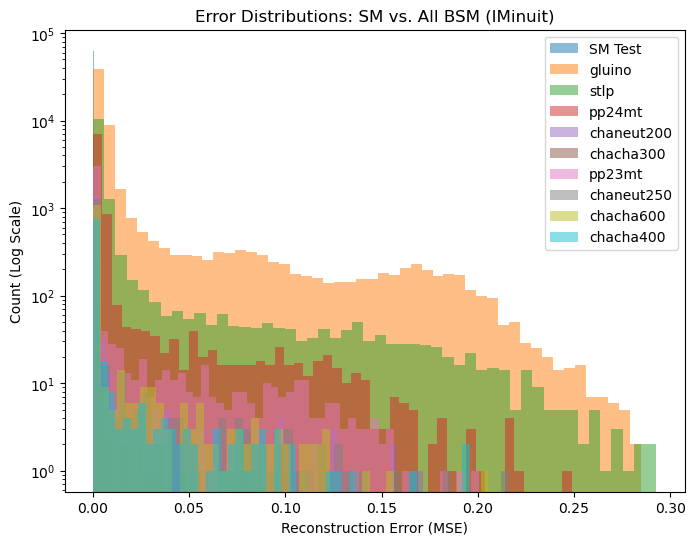

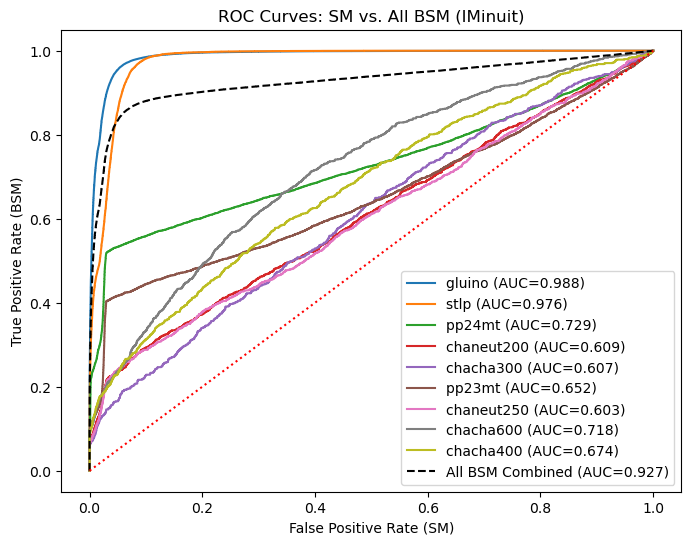


All BSM combined AUC= 0.927


In [13]:
# %% [code] Cell 3: iMinuit Final Training & Evaluation

"""
IMinuit Approach: Cell 3

- Reload full SM data
- Train final model with best hyperparams (with early stopping)
- Evaluate on SM test => compute 'mse_test'
- Evaluate on BSM => store 'mse_bsm' in bsm_results
- Plot 1) Single histogram for SM + all BSM error distributions
- Plot 2) Single ROC figure with each BSM curve + combined curve
"""

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

print("Reloading full SM data for final training.")
sm_all = load_events(sm_file)  # entire dataset
X_sm_all, meta_sm_all = process_events(sm_all, n_max=8)
print("Full SM dataset size:", len(X_sm_all))

# Fit a new scaler on full SM data (or reuse).
scaler_full= MinMaxScaler()
X_sm_all_scaled= scaler_full.fit_transform(X_sm_all)

X_train_all, X_test_all, meta_train_all, meta_test_all = train_test_split(
    X_sm_all_scaled, meta_sm_all, test_size=0.2, random_state=42
)
X_train_img= reshape_to_image(X_train_all,64,(8,8))
X_test_img=  reshape_to_image(X_test_all,64,(8,8))

# Build final model w/ best hyperparams
bf1= int(round(best_params['filters1']))
bf2= int(round(best_params['filters2']))
bld= int(round(best_params['latent_dim']))
blr= float(best_params['learning_rate'])
print(f"Final model: f1={bf1}, f2={bf2}, ld={bld}, lr={blr:.2e}")

def build_final_model(f1,f2,ld,lr):
    inp= layers.Input(shape=(8,8,1))
    x= layers.Conv2D(f1,3,activation='relu',padding='same')(inp)
    x= layers.MaxPooling2D((2,2),padding='same')(x)
    x= layers.Conv2D(f2,3,activation='relu',padding='same')(x)
    x= layers.MaxPooling2D((2,2),padding='same')(x)
    shp= tf.keras.backend.int_shape(x)
    x= layers.Flatten()(x)
    lat= layers.Dense(ld,name='latent')(x)
    x= layers.Dense(shp[1]*shp[2]*shp[3],activation='relu')(lat)
    x= layers.Reshape((shp[1],shp[2],shp[3]))(x)
    x= layers.Conv2DTranspose(f2,3,strides=2,activation='relu',padding='same')(x)
    x= layers.Conv2DTranspose(f1,3,strides=2,activation='relu',padding='same')(x)
    outp= layers.Conv2D(1,3,activation='sigmoid',padding='same')(x)
    mod= models.Model(inp,outp,name='IMinuitFinal')
    mod.compile(optimizer=optimizers.Adam(lr), loss='mse')
    return mod

final_model= build_final_model(bf1,bf2,bld,blr)
final_model.summary()

# Early stopping
es_final= callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_final= final_model.fit(
    X_train_img, X_train_img,
    epochs=50,            # up to 50, but early stopping
    batch_size=256,
    validation_split=0.2,
    verbose=1,
    callbacks=[es_final]
)

print("Final training complete.")

# Evaluate on SM test => MSE
recon_test= final_model.predict(X_test_img)
mse_test= np.mean((X_test_img - recon_test)**2, axis=(1,2,3))

# Evaluate on BSM => store in bsm_results
bsm_results={}
for key, path in bsm_files.items():
    print(f"Evaluating BSM: {key}")
    bsm_data= load_events(path)
    X_bsm, meta_bsm= process_events(bsm_data,n_max=8)
    X_bsm_sc= scaler_full.transform(X_bsm)
    X_bsm_img= reshape_to_image(X_bsm_sc,64,(8,8))
    recon_bsm= final_model.predict(X_bsm_img)
    mse_bsm= np.mean((X_bsm_img - recon_bsm)**2, axis=(1,2,3))
    bsm_results[key]= mse_bsm

# 1) Single histogram: SM + all BSM error distributions
plt.figure(figsize=(8,6))
plt.hist(mse_test, bins=50, alpha=0.5, label='SM Test')
for key, arr in bsm_results.items():
    plt.hist(arr, bins=50, alpha=0.5, label=key)
plt.yscale('log')
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Count (Log Scale)")
plt.title("Error Distributions: SM vs. All BSM (IMinuit)")
plt.legend()
plt.show()

# 2) Single ROC figure: each BSM curve + combined
plt.figure(figsize=(8,6))

all_scores= [mse_test]
all_labels= [np.zeros_like(mse_test,dtype=int)]

for key, arr in bsm_results.items():
    # Single-dataset ROC
    y_sm= np.zeros_like(mse_test,dtype=int)
    y_bsm= np.ones_like(arr,dtype=int)
    scores_one= np.concatenate([mse_test, arr])
    labels_one= np.concatenate([y_sm, y_bsm])
    fpr_, tpr_, thr_ = roc_curve(labels_one, scores_one)
    auc_1= auc(fpr_, tpr_)
    # Plot on the same figure
    plt.plot(fpr_, tpr_, label=f"{key} (AUC={auc_1:.3f})")
    
    # For combined, add to big arrays
    all_scores.append(arr)
    all_labels.append(np.ones_like(arr,dtype=int))

# Combined
scores_c= np.concatenate(all_scores)
labels_c= np.concatenate(all_labels)
fpr_c, tpr_c, thr_c= roc_curve(labels_c, scores_c)
auc_c= auc(fpr_c,tpr_c)

plt.plot(fpr_c, tpr_c, 'k--', label=f"All BSM Combined (AUC={auc_c:.3f})")
plt.plot([0,1],[0,1],'r:')
plt.xlabel("False Positive Rate (SM)")
plt.ylabel("True Positive Rate (BSM)")
plt.title("ROC Curves: SM vs. All BSM (IMinuit)")
plt.legend()
plt.show()

print(f"\nAll BSM combined AUC= {auc_c:.3f}")


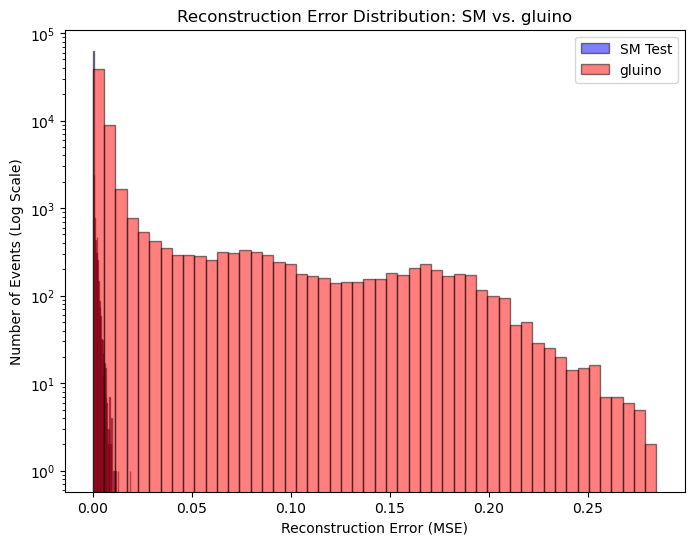

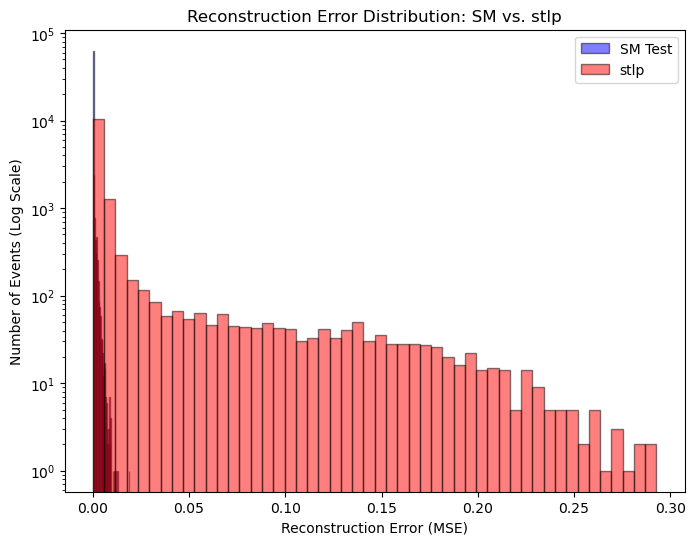

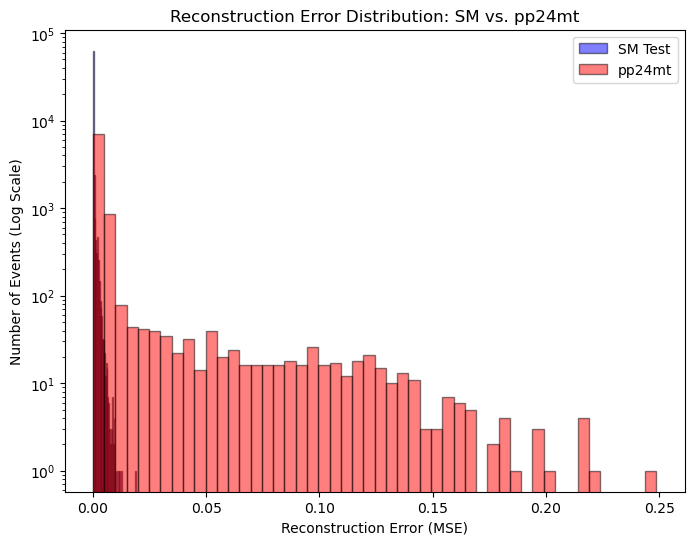

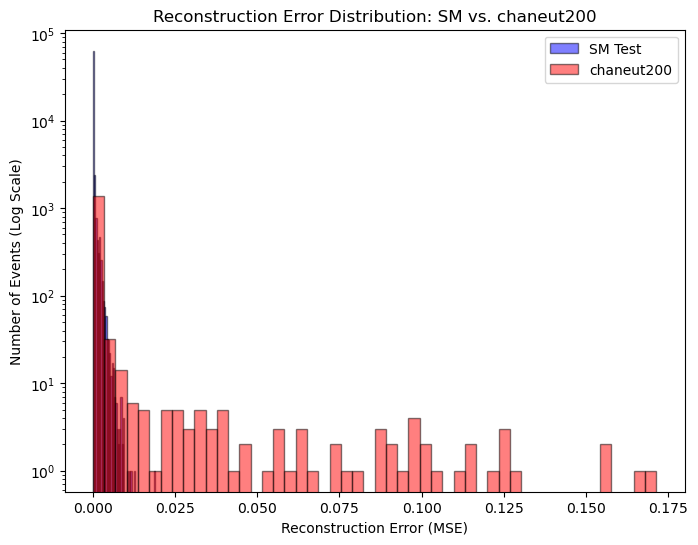

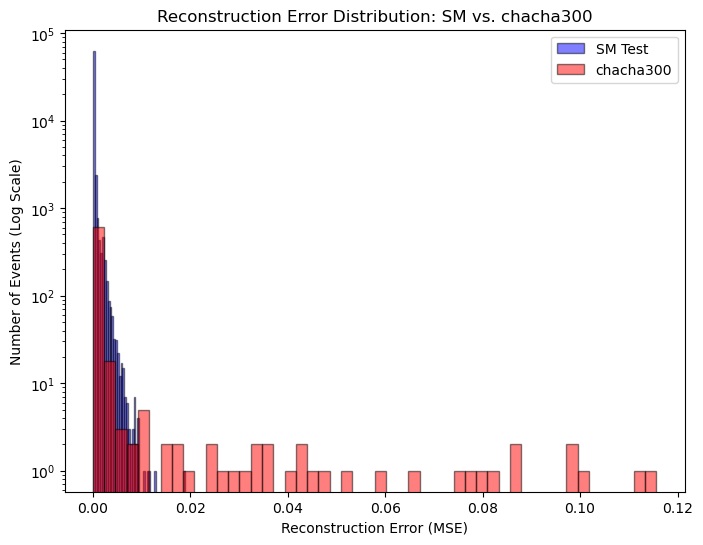

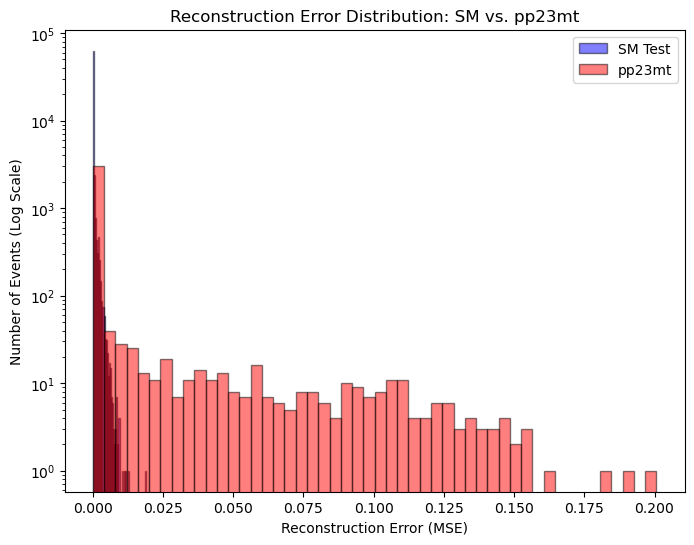

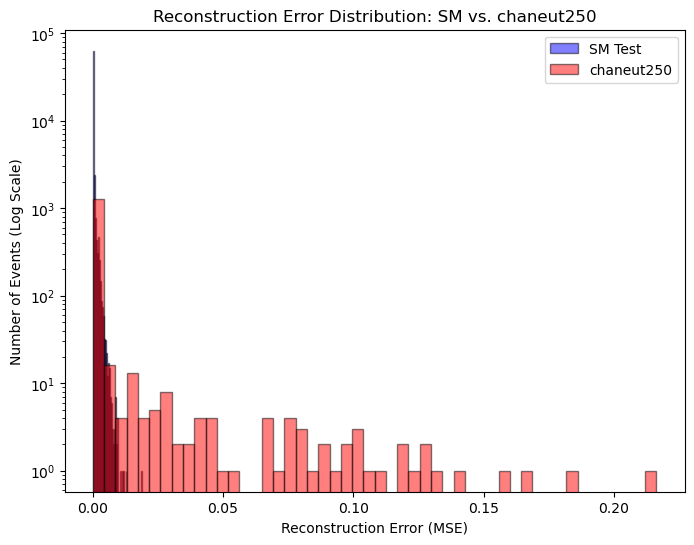

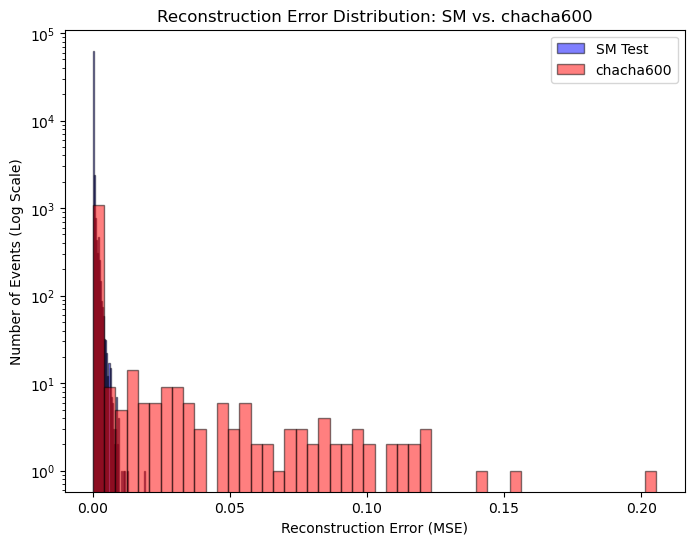

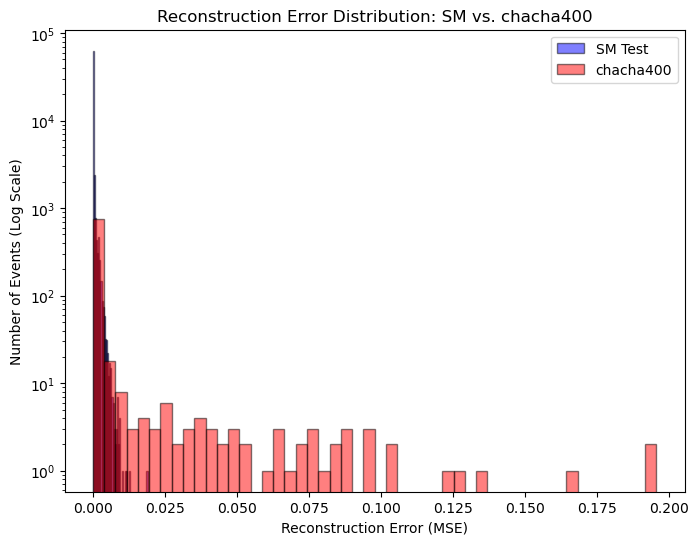

Finished plotting separate SM vs. each BSM error distribution.


In [15]:
"""
We will create one figure PER BSM dataset, showing:
- SM test error distribution (mse_test)
- That dataset's BSM error distribution (bsm_results[key])
"""

for key, arr_bsm in bsm_results.items():
    plt.figure(figsize=(8, 6))
    
    # Plot SM test distribution
    plt.hist(
        mse_test, 
        bins=50, 
        alpha=0.5, 
        color='blue', 
        edgecolor='black', 
        label='SM Test'
    )
    # Overlay the BSM distribution for this particular key
    plt.hist(
        arr_bsm, 
        bins=50, 
        alpha=0.5, 
        color='red', 
        edgecolor='black', 
        label=key
    )
    
    plt.yscale('log')  
    plt.xlabel("Reconstruction Error (MSE)")
    plt.ylabel("Number of Events (Log Scale)")
    plt.title(f"Reconstruction Error Distribution: SM vs. {key}")
    plt.legend()
    plt.show()

print("Finished plotting separate SM vs. each BSM error distribution.")


In [17]:
"""
Cell 4: Ranks the SM test events by reconstruction error (mse_test).

Requires:
 - 'mse_test': the array of reconstruction errors for SM test events
 - 'meta_test_all': the parallel list of metadata (event_id, process_id, weight)
   after the final train_test_split in Cell 3.
"""

import numpy as np

# Choose what fraction of highest-MSE SM events to inspect (1 %).
percent = 1.0

# Confirm that mse_test and meta_test_all have the same length:
assert len(mse_test) == len(meta_test_all), "Mismatch between mse_test and meta_test_all!"

# Calculate how many events correspond to that fraction.
topN = int(len(mse_test) * (percent / 100.0))
topN = max(topN, 1)  # ensure at least 1 event

# Sort indices in descending order of MSE
ranking_idx = np.argsort(mse_test)[::-1]
top_idx = ranking_idx[:topN]

print(f"Top {percent}% SM test events by highest MSE:")
for i in top_idx:
    evt_id     = meta_test_all[i][0]
    proc_id    = meta_test_all[i][1]
    evt_weight = meta_test_all[i][2]
    mse_value  = mse_test[i]
    print(f"Event ID={evt_id}, Process={proc_id}, Weight={evt_weight}, MSE={mse_value:.5f}")


Top 1.0% SM test events by highest MSE:
Event ID=67945, Process=Zgam, Weight=1.0, MSE=0.01901
Event ID=48, Process=ttbar, Weight=1.0, MSE=0.01292
Event ID=57, Process=ttbarGam, Weight=1.0, MSE=0.01165
Event ID=31670732, Process=z_jets, Weight=1.0, MSE=0.01109
Event ID=66, Process=ttbar, Weight=1.0, MSE=0.01041
Event ID=37054466, Process=z_jets, Weight=1.0, MSE=0.00946
Event ID=41670135, Process=gam_jets, Weight=1.0, MSE=0.00930
Event ID=78350840, Process=njets, Weight=1.0, MSE=0.00929
Event ID=33188340, Process=z_jets, Weight=1.0, MSE=0.00916
Event ID=29343883, Process=z_jets, Weight=1.0, MSE=0.00889
Event ID=21, Process=ttbar, Weight=1.0, MSE=0.00879
Event ID=34192278, Process=z_jets, Weight=1.0, MSE=0.00858
Event ID=1, Process=ttbar, Weight=1.0, MSE=0.00858
Event ID=29408550, Process=z_jets, Weight=1.0, MSE=0.00854
Event ID=42463, Process=wtopbar, Weight=1.0, MSE=0.00854
Event ID=8438010, Process=z_jets, Weight=1.0, MSE=0.00849
Event ID=159499938, Process=njets, Weight=1.0, MSE=0.008

# **Discussion of Model Evaluation**

### **1.1 Performance of the AE on SM vs. BSM**
From the single‐histogram overlay of SM test events (in purple or blue) and each BSM dataset (various colors) we observe that the **SM distribution** sits mostly at lower reconstruction errors, while **BSM** datasets exhibit a shift to higher values. This strongly suggests that our autoencoder, trained solely on SM data, finds BSM events less “familiar” and struggles to reconstruct them accurately, thus producing larger MSE. 

On the **ROC plot**, **gluino** and **stlp** signals stand out with extremely high AUCs (∼0.98+), meaning they are almost perfectly separable from SM. Meanwhile, some chargino–neutralino processes and others (e.g., chacha400) appear more subtle, showing intermediate AUCs near 0.62–0.70. Overall, the **combined** BSM curve achieves an AUC of ∼0.93, indicating robust anomaly detection across multiple signals.

---

### **1.2 Using the Anomaly Score to Find New Physics**
In this framework, each event’s **anomaly score** is simply its reconstruction error (MSE) after autoencoder inference. A low error implies the event is typical of SM training data; high error suggests unusual features. By selecting a threshold on this error, one flags everything above it as “anomalous.” The ROC curve effectively examines all possible thresholds, plotting how much of the SM distribution would be mis‐flagged (FPR) against how many BSM events (TPR) we would catch. 

This means that for signals like **gluino** or **stlp**, even a conservative threshold can achieve a high signal efficiency with minimal SM contamination. For the more subtle BSM processes overlapping with the SM tail, a compromise must be found between capturing those signals and maintaining a low SM false‐positive rate.

---

### **1.3 Scanning Over Anomaly Scores & Efficiencies**
The ROC analysis maps out TPR versus FPR over the full range of anomaly scores. To select a working point, we can select a desired FPR (e.g. 5%), then read off the TPR for each BSM. The shape of each ROC curve tells us how quickly we can improve signal capture before accumulating too many SM events in the same threshold window. Signals such as **gluino** maintain a high TPR at low FPR, whereas processes like **chaneut200** or **pp24mt** yield more moderate separations.

---

### **1.4 Which SM Events Are Most Anomalous?**
To identify *specific* SM events with particularly large errors—rather than just a global measure like AUC—we ranked the SM test events by their reconstruction error. The printed listing shows the top 1% in descending order, revealing that the most anomalous SM collisions predominantly come from sub‐processes such as **`Zgam`**, **`ttbar`**, **`z_jets`**, **`wtop`**, and **`ww`**, among others. These events often have MSE values around 0.005–0.02, placing them in a tail that partially overlaps with certain BSM distributions. 

Why do these collisions appear so anomalous? A deeper inspection could reveal:

- **High Multiplicities** or large final‐state particle energies (e.g., multiple jets/leptons in `ttbar` or `z_jets` events).  
- **Large Missing Energy** in processes like `ww`, `wtop`, or `Zgam` if multiple neutrinos or photons are involved.  
- **Corner‐Case Kinematics**: Uncommon angles, synergy of jets + photons, or special thresholds not well‐represented in the training sample.

From a physics standpoint, events in the SM tail might represent rare corners of phase space akin to new‐physics signatures, thereby increasing their reconstruction errors.

---

### **1.5 Limitations & Potential Improvements**
1. **Overlap With Rare SM**: Certain BSM processes remain difficult to isolate because they mimic rare SM sub‐processes in the high‐MSE tail.  
2. **Model Architecture**: Our current Conv2D autoencoder might be optimized further or replaced by more advanced generative/flow‐based or hybrid approaches to capture more subtle signals.  
3. **Hyperparameter Scope**: iMinuit’s search, while systematic, only tuned a few discrete parameters (filters, latent size, learning rate). Larger sweeps or deeper architectures might further improve results.

Moving forward, investigating why the top SM outliers appear so anomalous can help refine the training approach (e.g., by adding those edge‐case events into an augmented dataset or building specialized sub‐networks). Additional domain knowledge (like explicit separation by final‐state topologies) could also sharpen the separation for subtle new‐physics scenarios.

